In [8]:
!uv add xgboost

Resolved 91 packages in 1ms
Audited 89 packages in 4ms


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

plt.rcParams["font.family"] = "Malgun Gothic"  # 윈도우 한글 폰트
plt.rcParams["axes.unicode_minus"] = False

df = pd.read_csv("../output/seller_features.csv")

target = "is_abusing_seller"

feature_cols = [
    "avg_rating", "rating_std", "low_rating_ratio",
    "avg_review_length", "negative_keyword_ratio", "duplicate_review_ratio",
    "refund_question_ratio", "authenticity_question_ratio",
    "defect_question_ratio", "delivery_question_ratio",
    "question_to_review_ratio"
]

X = df[feature_cols].fillna(0)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

✅ Logistic Regression

In [10]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train_scaled, y_train)

pred = lr.predict(X_test_scaled)
proba = lr.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, pred))
print("ROC-AUC:", roc_auc_score(y_test, proba))

              precision    recall  f1-score   support

       False       0.93      0.43      0.59        30
        True       0.75      0.98      0.85        51

    accuracy                           0.78        81
   macro avg       0.84      0.71      0.72        81
weighted avg       0.81      0.78      0.75        81

ROC-AUC: 0.7483660130718954


✅ XGBoost

In [11]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)
proba = xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, pred))
print("ROC-AUC:", roc_auc_score(y_test, proba))

              precision    recall  f1-score   support

       False       0.87      0.43      0.58        30
        True       0.74      0.96      0.84        51

    accuracy                           0.77        81
   macro avg       0.80      0.70      0.71        81
weighted avg       0.79      0.77      0.74        81

ROC-AUC: 0.757516339869281


✅ Feature Importance

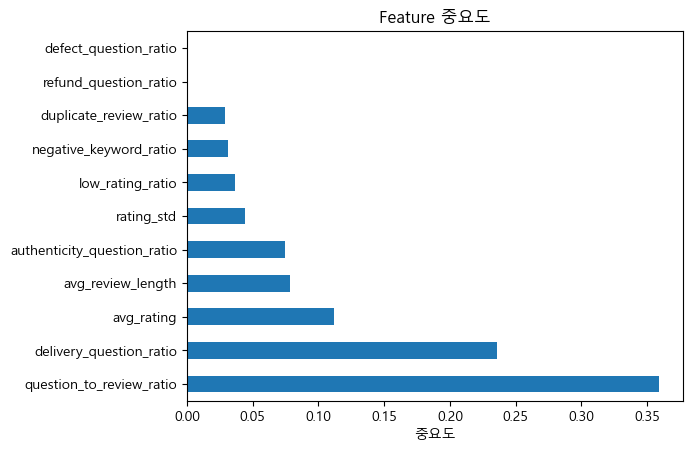

In [12]:
import matplotlib.pyplot as plt

importance = xgb.feature_importances_
feat_imp = pd.Series(importance, index=feature_cols).sort_values(ascending=False)

feat_imp.plot(kind="barh")
plt.title("Feature 중요도")
plt.xlabel("중요도")
plt.show()